In [2]:
from pydriller import Repository
import pandas as pd
import numpy as np
import re
from transformers import AutoTokenizer, AutoModel

c:\MYSTUFF\Academics\STT\Lab 2\sttl2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
repo_url = 'https://github.com/0xangelo/raylab'

for commit in Repository(repo_url).traverse_commits():
    print('Hash: {}, Author: {}, Message: {}'.format(commit.hash, commit.author.name, commit.msg))

Hash: 989a2092a714874548a37376151941c7fec4e1c6, Author: Ângelo Lovatto, Message: Initial commit
Hash: a45eda04efc5d5333a162e4f71b74a4edcefca72, Author: Ângelo Lovatto, Message: chore: add .gitignore

Signed-off-by: Ângelo Lovatto <angelolovatto@gmail.com>
Hash: 505585eb9c7fd48f3bc047fc79a518658bedb248, Author: Ângelo Lovatto, Message: chore: add custom loggers for rllib

Signed-off-by: Ângelo Lovatto <angelolovatto@gmail.com>
Hash: f1d28cf870dfb747b297dd3964d00e348a9e39d3, Author: Ângelo Lovatto, Message: chore: add pre-commit configurations

Signed-off-by: Ângelo Lovatto <angelolovatto@gmail.com>
Hash: c621a67aa26c8da3ca1a9b5f8b717decffdbd310, Author: Ângelo Lovatto, Message: chore: move logger to package

Signed-off-by: Ângelo Lovatto <angelolovatto@gmail.com>
Hash: b820c326fdd716a7e4b7c00dbff53a8dae1c3f10, Author: Ângelo Lovatto, Message: chore: delete check_commit_message_script

Signed-off-by: Ângelo Lovatto <angelolovatto@gmail.com>
Hash: 253ca5ca6ac53f161f5f94da3e7caf04bab0d6bb,

In [4]:
import warnings
warnings.filterwarnings("ignore", category=ResourceWarning)

In [ ]:
pattern = re.compile(
    r"""
    (?:                                # any of the alternatives
      \[\s*bug\s*\]                    # [BUG]
    | \bfix(?:e[sd]?|ing)?\b           # fix, fixes, fixed, fixing
    | \bbug(?:s|fix(?:e[sd]?|ing)?)?\b # bug, bugs, bugfix, bugfixes, bugfixing
    | \berror(?:s)?\b                  # error, errors
    | \bissue(?:s)?\b                  # issue, issues
    )
    """,
    re.IGNORECASE | re.VERBOSE
)


In [ ]:
rows = []
for commit in Repository(repo_url).traverse_commits():
    msg = commit.msg or ""

    if pattern.search(msg):
        rows.append({
            "Hash": commit.hash,
            "Message": msg,
            "Hashes of parents": commit.parents,
            "Is a merge commit?": len(commit.parents) > 1,
            "List of modified files": [m.new_path or m.old_path for m in commit.modified_files]
        })

df = pd.DataFrame(rows, columns=[
    "Hash", "Message", "Hashes of parents", "Is a merge commit?", "List of modified files"
])
df.to_csv("bug_fixing_commits_regex.csv", index=False)

print(f"Found {len(df)} commits matching bug-fix regex")

Found 435 commits matching bug-fix regex


In [7]:
df.head(10)

,Hash,Message,Hashes of parents,Is a merge commit?,List of modified files
0,c9832a76f6af231bffde5209ae0b0377be8d6a45,fix: add default config for torch optimizer\n\...,[93f25126c645c2aa9c12b9b640baebb1181752a9],False,[raylab\algorithms\naf\naf.py]
1,570441605fd5982d557fa673596f7572e4f3e9bb,fix(naf): disable gradient computation in comp...,[c9832a76f6af231bffde5209ae0b0377be8d6a45],False,[raylab\algorithms\naf\naf_policy.py]
2,265fc2e1faaf5ba4d9effcc7eb4fdf16fa14c5d6,fix(td3): check if horizon is None\n\nSigned-o...,[570441605fd5982d557fa673596f7572e4f3e9bb],False,[raylab\algorithms\ddpg\ddpg_policy.py]
3,60fc408c34db933570397e6a919429067de83e27,fix(naf): return info dict with loss computati...,[9ea553df1659149c7aab75ee4985f1c49d443ed3],False,[raylab\algorithms\naf\naf_policy.py]
4,aa154c5c82be0b16c5cfcf03a8db91058cf03a40,fix(tests): return scalar reward in MockEnv\n\...,[60fc408c34db933570397e6a919429067de83e27],False,[tests\mock_env.py]
5,8d7713801bde2a98cab7368b446880ceaff3a192,fix(naf): remove in-place operations and calcu...,[34a76ec20040fa19b19ed118b1743e161bfdd319],False,[raylab\algorithms\naf\naf_module.py]
6,1b5bb84187787f51de085d2dd202f0dcd8e7a83a,fix(naf): correctly calculate best value\n\nSi...,[95d6dd44122a76ed4c09ba34a5b7f6a0f1165317],False,[raylab\algorithms\naf\naf_policy.py]
7,a002efa225a8d28d5f746f72972cc49a60cd43f4,fix(scripts): add script import routine\n\nSig...,[8ec4206fcbd75927081e13ad2cbe2e4e184339ea],False,[scripts\tune_experiment.py]
8,7f16949fbf86ba24bf30665e926806358dfc89cd,fix(naf): optimize the parameters of the main ...,[a62ef27f94fd024db3eeb97bad9b756e3beb0cf1],False,[raylab\algorithms\naf\naf_policy.py]
9,bd87b22c92e5ec9348e5865c9b2867c7eab3acec,fix(naf): return appropriate advantage shape\n...,[f68f46717462b78e3c6a8f7cb76ff521b578135d],False,[raylab\algorithms\naf\naf_module.py]


In [8]:
rows = []
for commit in Repository(repo_url).traverse_commits():
    msg = commit.msg or ""

    if pattern.search(msg):
        for file in commit.modified_files:
            before_code, after_code = None, None
            try:
                before_code = file.source_code_before
            except Exception as e:
                print(f"Skipping before_code for {file.filename} at {commit.hash}: {e}")
                continue

            try:
                after_code = file.source_code
            except Exception as e:
                print(f"Skipping after_code for {file.filename} at {commit.hash}: {e}")
                continue

            rows.append({
                "Hash": commit.hash,
                "Message": msg,
                "Filename": file.filename,
                "Source Code (before)": before_code,
                "Source Code (after)": after_code,
                "Diff": file.diff,
                "LLM Inference (fix type)": None,
                "Rectified Message": None
            })

messageDataframe = pd.DataFrame(rows)
messageDataframe.to_csv("message_commit_diffs.csv", index=False, encoding="utf-8")

In [9]:
messageDataframe.head(10)

,Hash,Message,Filename,Source Code (before),Source Code (after),Diff,LLM Inference (fix type),Rectified Message
0,c9832a76f6af231bffde5209ae0b0377be8d6a45,fix: add default config for torch optimizer\n\...,naf.py,"""""""Continuous Q-Learning with Normalized Advan...","""""""Continuous Q-Learning with Normalized Advan...","@@ -13,6 +13,8 @@ DEFAULT_CONFIG = with_common...",None,None
1,570441605fd5982d557fa673596f7572e4f3e9bb,fix(naf): disable gradient computation in comp...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -42,8 +42,9 @@ class NAFTorchPolicy(Policy)...",None,None
2,265fc2e1faaf5ba4d9effcc7eb4fdf16fa14c5d6,fix(td3): check if horizon is None\n\nSigned-o...,ddpg_policy.py,"""""""Updated DDPG policy with Partial Episode Bo...","""""""Updated DDPG policy with Partial Episode Bo...","@@ -5,14 +5,17 @@ from ray.rllib.agents.ddpg i...",None,None
3,60fc408c34db933570397e6a919429067de83e27,fix(naf): return info dict with loss computati...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -101,7 +101,7 @@ class NAFTorchPolicy(Polic...",None,None
4,aa154c5c82be0b16c5cfcf03a8db91058cf03a40,fix(tests): return scalar reward in MockEnv\n\...,mock_env.py,"""""""Dummy gym.Env subclasses.""""""\nimport gym\nf...","""""""Dummy gym.Env subclasses.""""""\nimport gym\nf...","@@ -21,4 +21,4 @@ class MockEnv(gym.Env): # p...",None,None
5,8d7713801bde2a98cab7368b446880ceaff3a192,fix(naf): remove in-place operations and calcu...,naf_module.py,"""""""Normalized Advantage Function nn.Module.""""""...","""""""Normalized Advantage Function nn.Module.""""""...","@@ -22,7 +22,7 @@ class NAFModule(nn.Module):\...",None,None
6,1b5bb84187787f51de085d2dd202f0dcd8e7a83a,fix(naf): correctly calculate best value\n\nSi...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -96,9 +96,10 @@ class NAFTorchPolicy(Policy...",None,None
7,a002efa225a8d28d5f746f72972cc49a60cd43f4,fix(scripts): add script import routine\n\nSig...,tune_experiment.py,from importlib import import_module\n\nimport ...,import sys\nimport os.path as osp\nimport path...,"@@ -1,3 +1,6 @@\n+import sys\n+import os.path ...",None,None
8,7f16949fbf86ba24bf30665e926806358dfc89cd,fix(naf): optimize the parameters of the main ...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -151,13 +151,14 @@ class NAFTorchPolicy(Pol...",None,None
9,bd87b22c92e5ec9348e5865c9b2867c7eab3acec,fix(naf): return appropriate advantage shape\n...,naf_module.py,"""""""Normalized Advantage Function nn.Module.""""""...","""""""Normalized Advantage Function nn.Module.""""""...","@@ -82,8 +82,8 @@ class AdvantageModule(nn.Mod...",None,None


In [10]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

model_name = "mamiksik/CommitPredictorT5"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

def generate_message(message, diff, max_length=64):
    input_text = f"Message: {message}\nDiff: {diff}"
    
    inputs = tokenizer(
        input_text,
        return_tensors="pt",
        truncation=True,
        max_length=512 
    )
    
    outputs = model.generate(**inputs, max_length=max_length)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


for i, row in messageDataframe.iterrows():
    inferred = generate_message(row["Message"],row["Diff"])
    messageDataframe.at[i, "LLM Inference (fix type)"] = inferred


In [ ]:
messageDataframe.to_csv("message_commit_diffs_with_LLM_inference.csv", index=False, encoding="utf-8")
messageDataframe.head()


,Hash,Message,Filename,Source Code (before),Source Code (after),Diff,LLM Inference (fix type),Rectified Message
0,c9832a76f6af231bffde5209ae0b0377be8d6a45,fix: add default config for torch optimizer\n\...,naf.py,"""""""Continuous Q-Learning with Normalized Advan...","""""""Continuous Q-Learning with Normalized Advan...","@@ -13,6 +13,8 @@ DEFAULT_CONFIG = with_common...",add default config for torch optimizer,None
1,570441605fd5982d557fa673596f7572e4f3e9bb,fix(naf): disable gradient computation in comp...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -42,8 +42,9 @@ class NAFTorchPolicy(Policy)...",fix missing torch.no_grad() in naf,None
2,265fc2e1faaf5ba4d9effcc7eb4fdf16fa14c5d6,fix(td3): check if horizon is None\n\nSigned-o...,ddpg_policy.py,"""""""Updated DDPG policy with Partial Episode Bo...","""""""Updated DDPG policy with Partial Episode Bo...","@@ -5,14 +5,17 @@ from ray.rllib.agents.ddpg i...",fix postprocessing of sample batches,None
3,60fc408c34db933570397e6a919429067de83e27,fix(naf): return info dict with loss computati...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -101,7 +101,7 @@ class NAFTorchPolicy(Polic...",fix missing default config,None
4,aa154c5c82be0b16c5cfcf03a8db91058cf03a40,fix(tests): return scalar reward in MockEnv\n\...,mock_env.py,"""""""Dummy gym.Env subclasses.""""""\nimport gym\nf...","""""""Dummy gym.Env subclasses.""""""\nimport gym\nf...","@@ -21,4 +21,4 @@ class MockEnv(gym.Env): # p...",fix test_gym_env_test.py,None


In [12]:
commit_groups = messageDataframe.groupby("Hash")
commits_df = pd.DataFrame([
    {
        "Hash": h,
        "Message": group["Message"].iloc[0],
        "AllDiffs": "\n".join(group["Diff"].dropna().tolist())
    }
    for h, group in commit_groups
])

In [13]:
commit_messages = {}
for h, group in messageDataframe.groupby("Hash"):
    all_diffs = "\n".join(group["Diff"].dropna().tolist())
    raw_msg = group["Message"].iloc[0]
    commit_msg = generate_message(raw_msg, all_diffs)
    commit_messages[h] = commit_msg

In [14]:
commit_messages


{'007060d3d5aad5374ae3526d59eb6509cd311375': 'add tests for bokeh 2.2.2+version',
 '00b180a0aff33abe745c55cdaafb84dcba65edc5': 'fix gym env fix',
 '015101a674f5bda36055d80a2f9d894c2a5e60ed': 'fix model snapshot',
 '0339458acffe58835e6379231322e83a6102594f': 'fix default policy delay in mage_cmd',
 '03719844b051ba936de9fde0818d14f414875ff0': 'add tests for policy',
 '03dbb1481f40947b8e104398b27c5720cec41ac6': 'fix a bug in replaybuffer',
 '04537c6eb01508d99eda653c14a1e150bdeee151': 'fix issue with off policy',
 '05131fc70ac9ae68d9049ff73f68bf41d63ebf7e': 'add missing docstrings',
 '058e8da16d1fbce8ce5b10663bd4f4ef481b1ad7': 'fix mock_env_test.py',
 '0590cf135e148dc8e4b5289352894c2742749ea8': 'fix missing import',
 '069c84570cee73b4eba99d77fc97a4d7bd228ab5': 'add missing envfn overrides',
 '09abd40da78710e2809e1384ea7677054bfd51b8': 'fix deterministic actor',
 '0b4006b84f68e84e4cf1cda623f208793165e98c': 'fix error in env.py',
 '0b973edc2fc71918b506a51ff05c20b3e9fea785': 'fix error in env

In [ ]:
def rectify_message(commit_message, file_diff, max_length=64):
    input_text = f"Commit-Level Message: {commit_message}\nFile Diff:\n{file_diff}"
    return generate_message(commit_message, file_diff, max_length=max_length)

for i, row in messageDataframe.iterrows():
    h = row["Hash"]
    if h in commit_messages:
        commit_level_msg = commit_messages[h]
        rectified = rectify_message(commit_level_msg, row["Diff"])
        messageDataframe.at[i, "Rectified Message"] = rectified
    else:
        messageDataframe.at[i, "Rectified Message"] = None 

In [16]:
messageDataframe.to_csv("message_commit_diffs_with_rectified_message.csv", index=False, encoding="utf-8")

In [17]:
messageDataframe.head(10)

,Hash,Message,Filename,Source Code (before),Source Code (after),Diff,LLM Inference (fix type),Rectified Message
0,c9832a76f6af231bffde5209ae0b0377be8d6a45,fix: add default config for torch optimizer\n\...,naf.py,"""""""Continuous Q-Learning with Normalized Advan...","""""""Continuous Q-Learning with Normalized Advan...","@@ -13,6 +13,8 @@ DEFAULT_CONFIG = with_common...",add default config for torch optimizer,add default config for torch optimizernodeliff
1,570441605fd5982d557fa673596f7572e4f3e9bb,fix(naf): disable gradient computation in comp...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -42,8 +42,9 @@ class NAFTorchPolicy(Policy)...",fix missing torch.no_grad() in naf,fix missing torch.no_grad() in naforchpolicy
2,265fc2e1faaf5ba4d9effcc7eb4fdf16fa14c5d6,fix(td3): check if horizon is None\n\nSigned-o...,ddpg_policy.py,"""""""Updated DDPG policy with Partial Episode Bo...","""""""Updated DDPG policy with Partial Episode Bo...","@@ -5,14 +5,17 @@ from ray.rllib.agents.ddpg i...",fix postprocessing of sample batches,fix postprocessing of sample batches
3,60fc408c34db933570397e6a919429067de83e27,fix(naf): return info dict with loss computati...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -101,7 +101,7 @@ class NAFTorchPolicy(Polic...",fix missing default config,fix missing default config
4,aa154c5c82be0b16c5cfcf03a8db91058cf03a40,fix(tests): return scalar reward in MockEnv\n\...,mock_env.py,"""""""Dummy gym.Env subclasses.""""""\nimport gym\nf...","""""""Dummy gym.Env subclasses.""""""\nimport gym\nf...","@@ -21,4 +21,4 @@ class MockEnv(gym.Env): # p...",fix test_gym_env_test.py,fix test_gym_env_test.py
5,8d7713801bde2a98cab7368b446880ceaff3a192,fix(naf): remove in-place operations and calcu...,naf_module.py,"""""""Normalized Advantage Function nn.Module.""""""...","""""""Normalized Advantage Function nn.Module.""""""...","@@ -22,7 +22,7 @@ class NAFModule(nn.Module):\...",add tril matrix module,add tril matrix module
6,1b5bb84187787f51de085d2dd202f0dcd8e7a83a,fix(naf): correctly calculate best value\n\nSi...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -96,9 +96,10 @@ class NAFTorchPolicy(Policy...",fix missing mseloss,fix missing mselossonchange
7,a002efa225a8d28d5f746f72972cc49a60cd43f4,fix(scripts): add script import routine\n\nSig...,tune_experiment.py,from importlib import import_module\n\nimport ...,import sys\nimport os.path as osp\nimport path...,"@@ -1,3 +1,6 @@\n+import sys\n+import os.path ...",add missing import,add missing importnoreloaddiff command
8,7f16949fbf86ba24bf30665e926806358dfc89cd,fix(naf): optimize the parameters of the main ...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -151,13 +151,14 @@ class NAFTorchPolicy(Pol...",fix missing missing param in nodoc,fix nodocnorender
9,bd87b22c92e5ec9348e5865c9b2867c7eab3acec,fix(naf): return appropriate advantage shape\n...,naf_module.py,"""""""Normalized Advantage Function nn.Module.""""""...","""""""Normalized Advantage Function nn.Module.""""""...","@@ -82,8 +82,8 @@ class AdvantageModule(nn.Mod...",fix advantage module with signed off by,fix advantagemodule with signed off bybydiff


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModel.from_pretrained("microsoft/codebert-base")
df = pd.read_csv("message_commit_diffs_with_rectified_message.csv")
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
commit_groups = df.groupby("Hash")["Diff"].apply(lambda x: " ".join(str(d) for d in x)).reset_index()
commit_groups = commit_groups.merge(df[["Hash","Message","LLM Inference (fix type)","Rectified Message"]], on="Hash").drop_duplicates("Hash")


c:\MYSTUFF\Academics\STT\Lab 2\sttl2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sims = {"Hash": [], "orig": [], "llm": [], "rect": []}

for _, row in commit_groups.iterrows():
    diff_emb = get_embedding(row["Diff"])
    
    orig_emb = get_embedding(str(row["Message"]))
    llm_emb  = get_embedding(str(row["LLM Inference (fix type)"]))
    rect_emb = get_embedding(str(row["Rectified Message"]))
    
    sims["Hash"].append(row["Hash"])
    sims["orig"].append(cosine_similarity([diff_emb],[orig_emb])[0][0])
    sims["llm"].append(cosine_similarity([diff_emb],[llm_emb])[0][0])
    sims["rect"].append(cosine_similarity([diff_emb],[rect_emb])[0][0])

sim_df = pd.DataFrame(sims)


In [7]:
hit_rates = {
    "Original": (sim_df["orig"]).mean(),
    "LLM": (sim_df["llm"]).mean(),
    "Rectified": (sim_df["rect"]).mean()
}
print("Hit Rates:", hit_rates)


Hit Rates: {'Original': np.float32(0.91356045), 'LLM': np.float32(0.8592455), 'Rectified': np.float32(0.8654216)}


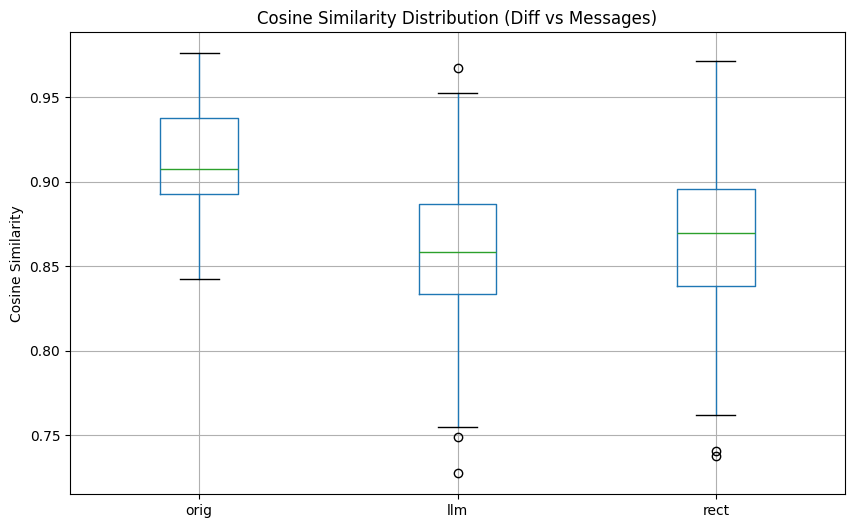

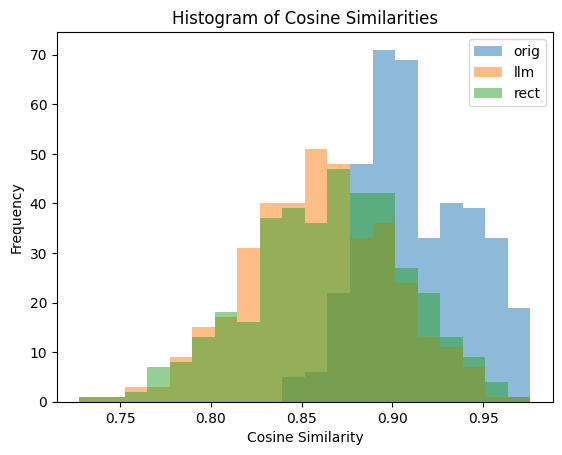

In [5]:
plt.figure(figsize=(10,6))
sim_df[["orig","llm","rect"]].boxplot()
plt.title("Cosine Similarity Distribution (Diff vs Messages)")
plt.ylabel("Cosine Similarity")
plt.show()

sim_df[["orig","llm","rect"]].plot.hist(alpha=0.5, bins=20)
plt.title("Histogram of Cosine Similarities")
plt.xlabel("Cosine Similarity")
plt.show()


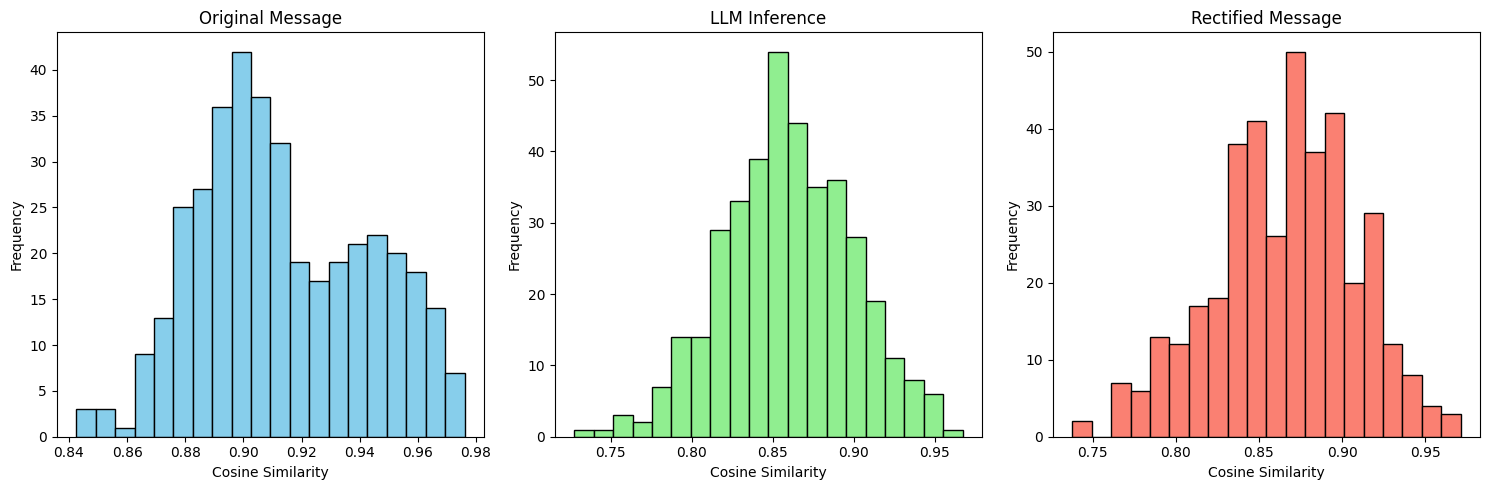

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sim_df["orig"].plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Original Message")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
sim_df["llm"].plot.hist(bins=20, color="lightgreen", edgecolor="black")
plt.title("LLM Inference")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
sim_df["rect"].plot.hist(bins=20, color="salmon", edgecolor="black")
plt.title("Rectified Message")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
